# **Task-3**
>
Sheshagiri

Satwik Narwa

Guduguntla Yashwanth


# **Import**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# **Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving engine_failure_dataset.csv to engine_failure_dataset.csv


In [ ]:
df = pd.read_csv("engine_failure_dataset.csv")
#  Show first rows to see what data look like
df.head()

,Time_Stamp,Temperature (°C),RPM,Fuel_Efficiency,Vibration_X,Vibration_Y,Vibration_Z,Torque,Power_Output (kW),Fault_Condition,Operational_Mode
0,2024-12-24 10:00:00,60.308585,3426.827588,20.445472,0.874657,0.005686,0.529798,107.877659,23.367684,2,Idle
1,2024-12-24 10:05:00,112.705055,2949.758424,23.083947,0.696461,0.391779,0.124336,60.351655,57.941022,3,Cruising
2,2024-12-24 10:10:00,108.670976,1817.971040,20.555326,0.495276,0.189714,0.886417,110.986564,47.732998,2,Cruising
3,2024-12-24 10:15:00,107.114691,2730.660539,23.226431,0.986206,0.983202,0.468114,77.416793,44.112039,2,Cruising
4,2024-12-24 10:20:00,118.075814,1854.488677,21.148226,0.710810,0.101139,0.481034,100.475881,80.681972,2,Cruising


In [ ]:
print(df.head())

            Time_Stamp  Temperature (°C)          RPM  Fuel_Efficiency  \
0  2024-12-24 10:00:00         60.308585  3426.827588        20.445472   
1  2024-12-24 10:05:00        112.705055  2949.758424        23.083947   
2  2024-12-24 10:10:00        108.670976  1817.971040        20.555326   
3  2024-12-24 10:15:00        107.114691  2730.660539        23.226431   
4  2024-12-24 10:20:00        118.075814  1854.488677        21.148226   

   Vibration_X  Vibration_Y  Vibration_Z      Torque  Power_Output (kW)  \
0     0.874657     0.005686     0.529798  107.877659          23.367684   
1     0.696461     0.391779     0.124336   60.351655          57.941022   
2     0.495276     0.189714     0.886417  110.986564          47.732998   
3     0.986206     0.983202     0.468114   77.416793          44.112039   
4     0.710810     0.101139     0.481034  100.475881          80.681972   

   Fault_Condition Operational_Mode  
0                2             Idle  
1                3         C

In [ ]:
print(df.isnull().sum())

Time_Stamp           0
Temperature (°C)     0
RPM                  0
Fuel_Efficiency      0
Vibration_X          0
Vibration_Y          0
Vibration_Z          0
Torque               0
Power_Output (kW)    0
Fault_Condition      0
Operational_Mode     0
dtype: int64


In [ ]:
#  Count how many for each fault type (0,1,2,3)
fault_counts = df['Fault_Condition'].value_counts().sort_index()

print("How many record for each fault type:")
print(fault_counts)

How many record for each fault type:
Fault_Condition
0    258
1    248
2    265
3    229
Name: count, dtype: int64


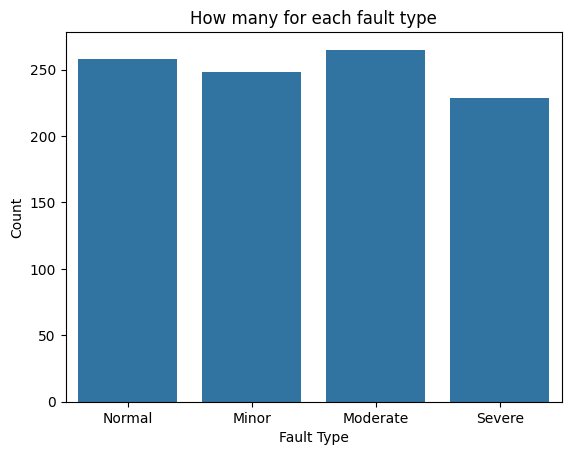

In [ ]:
# Make bar chart to see how fault type show
fault_labels = ['Normal', 'Minor', 'Moderate', 'Severe']
sns.barplot(x=fault_counts.index, y=fault_counts.values)
plt.xticks(ticks=[0, 1, 2, 3], labels=fault_labels)
plt.xlabel("Fault Type")
plt.ylabel("Count")
plt.title("How many for each fault type")
plt.show()

In [ ]:
data = df
df = df.dropna(subset=["Fault_Condition"])

label_encoder = LabelEncoder()
df["FaultEncoded"] = label_encoder.fit_transform(df["Fault_Condition"])

# Define features (X) and target (y)
X = df.drop(["Time_Stamp", "Fault_Condition", "Operational_Mode", "FaultEncoded"], axis=1)
y = df["FaultEncoded"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

DecisionTree


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

           0       0.27      0.23      0.25        52
           1       0.27      0.31      0.29        49
           2       0.34      0.38      0.36        53
           3       0.29      0.26      0.27        46

    accuracy                           0.29       200
   macro avg       0.29      0.29      0.29       200
weighted avg       0.29      0.29      0.29       200



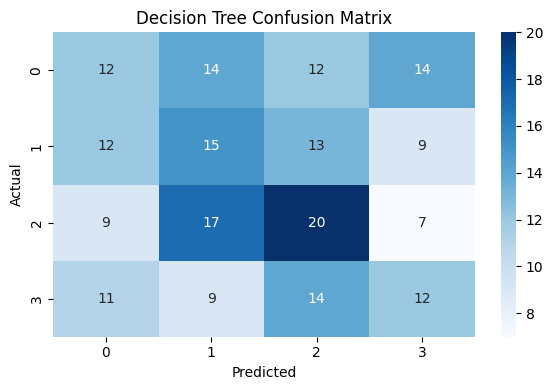

In [ ]:
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_conf_matrix(y_test, y_pred, "Decision Tree Confusion Matrix")

# RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

=== Random Forest Report ===
              precision    recall  f1-score   support

           0       0.31      0.33      0.32        52
           1       0.24      0.27      0.25        49
           2       0.25      0.28      0.27        53
           3       0.31      0.22      0.26        46

    accuracy                           0.28       200
   macro avg       0.28      0.27      0.27       200
weighted avg       0.28      0.28      0.27       200



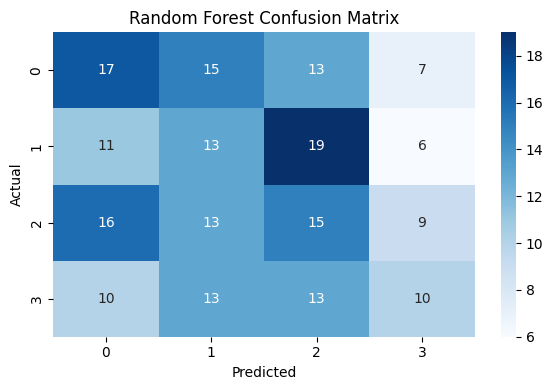

In [ ]:
rf_preds = rf_model.predict(X_test)
print("=== Random Forest Report ===")
print(classification_report(y_test, rf_preds, target_names=[str(cls) for cls in label_encoder.classes_]))

# Use the helper function to plot the confusion matrix
plot_conf_matrix(y_test, rf_preds, "Random Forest Confusion Matrix")

In [ ]:
#import joblib
#from google.colab import files

# Changed 'model' to 'rf_model' to save the Random Forest model
#joblib.dump(rf_model, "fault_classifier.pkl")
#files.download("fault_classifier.pkl")